## VQE

#### 准备环境

In [1]:
import matplotlib.pyplot as plt

from qutrunk.algorithm.vqe import VQE
from qutrunk.circuit.gates import PauliCoeffs, PauliCoeff, PauliType, Matrix


#### 用例1，使用Matrix

In [2]:
H2_op = Matrix([[-1.06365335 + 0.j, 0. + 0.j, 0. + 0.j, 0.1809312 + 0.j],
                [0. + 0.j, -1.83696799 + 0.j, 0.1809312 + 0.j, 0. + 0.j],
                [0. + 0.j, 0.1809312 + 0.j, -0.24521829 + 0.j, 0. + 0.j],
                [0.1809312 + 0.j, 0. + 0.j, 0. + 0.j, -1.06365335 + 0.j]])

#### 用例1，使用pauli sum

In [3]:
g0 = -1.052373245772859
g1 = 0.39793742484318045
g2 = -0.39793742484318045
g3 = -0.01128010425623538
g4 = 0.18093119978423156
H2_op = PauliCoeffs() \
        << PauliCoeff(g0, []) \
        << PauliCoeff(g1, [PauliType.PAULI_I, PauliType.PAULI_Z]) \
        << PauliCoeff(g2, [PauliType.PAULI_Z]) \
        << PauliCoeff(g3, [PauliType.PAULI_Z, PauliType.PAULI_Z]) \
        << PauliCoeff(g4, [PauliType.PAULI_X, PauliType.PAULI_X])

#### 用例2，使用 Pauli sum

In [4]:
g0 = -0.4804
g1 = +0.3435
g2 = -0.4347
g3 = +0.5716
g4 = +0.0910
g5 = +0.0910
H2_op = PauliCoeffs() \
        << PauliCoeff(g0, []) \
        << PauliCoeff(g1, [PauliType.PAULI_I, PauliType.PAULI_Z]) \
        << PauliCoeff(g2, [PauliType.PAULI_Z]) \
        << PauliCoeff(g3, [PauliType.PAULI_Z, PauliType.PAULI_Z]) \
        << PauliCoeff(g4, [PauliType.PAULI_X, PauliType.PAULI_X]) \
        << PauliCoeff(g4, [PauliType.PAULI_Y, PauliType.PAULI_Y])

#### VQE 求解

In [5]:
vqe = VQE(2)
res = vqe.compute_minimum_eigenvalue(H2_op)
vqe.print_ansatz()
print(res.eigenvalue)
print(res.eigenstate)

      ┌────┐┌────┐                  ┌────┐┌────┐                  
q[0]: ┤ Ry ├┤ Rz ├──────────────■───┤ Ry ├┤ Rz ├──────────────■───
      └────┘└────┘┌────┐┌────┐┌─┴──┐└────┘└────┘┌────┐┌────┐┌─┴──┐
q[1]: ────────────┤ Ry ├┤ Rz ├┤ CX ├────────────┤ Ry ├┤ Rz ├┤ CX ├
                  └────┘└────┘└────┘            └────┘└────┘└────┘
 c: 2/════════════════════════════════════════════════════════════
                                                                  
-1.8511990845455928
[ 5.47672877e-07+4.92104587e-05j  6.19882492e-02+9.65143076e-02j
 -5.37597310e-01-8.35363138e-01j  4.30166529e-05-3.20182039e-05j]


#### 调整参数绘图

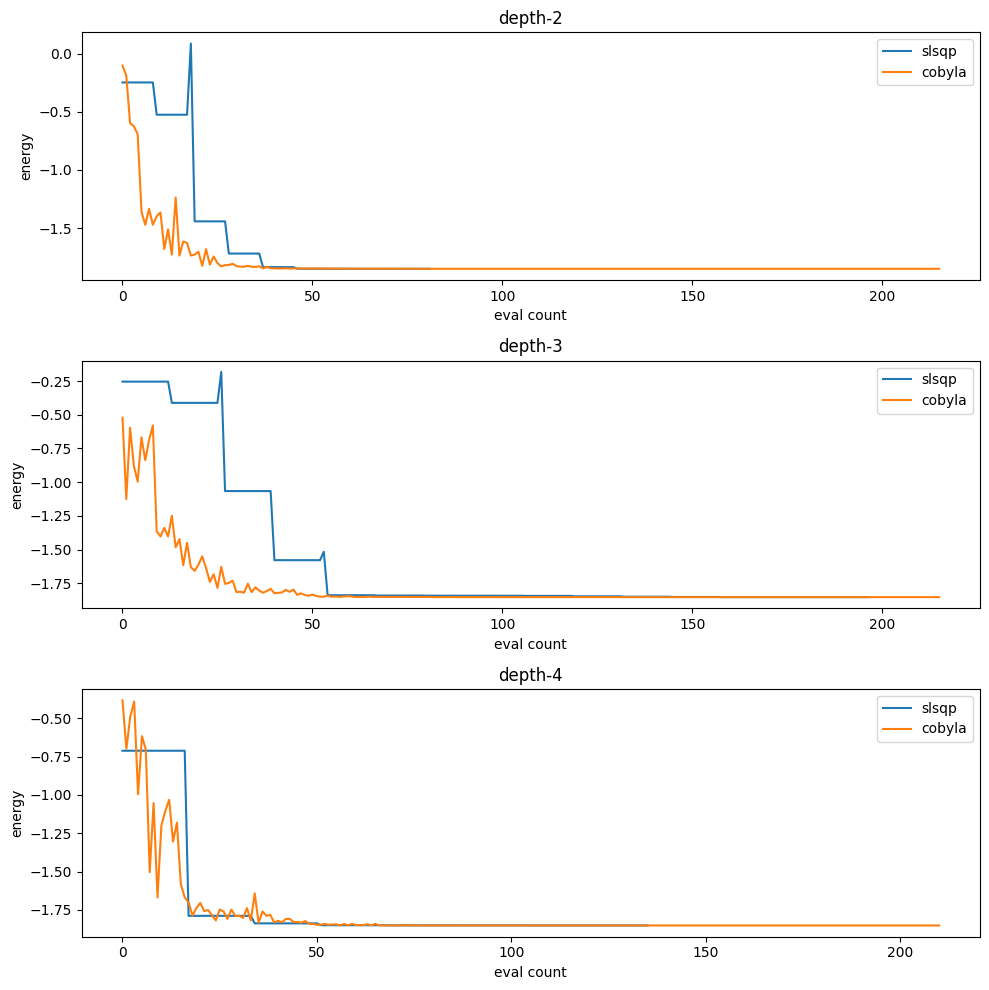

In [6]:
depths = [2, 3, 4]
opts = ["slsqp", "cobyla"]

fig, axs = plt.subplots(len(depths), 1, figsize=(10, 10), layout='tight')

for i, depth in enumerate(depths):
    for opt in opts:
        params = []
        vals = []


        def store_res(param, val):
            params.append(param)
            vals.append(val)


        vqe = VQE(2, depth, optimizer=opt, callback=store_res, max_iter=300)
        res = vqe.compute_minimum_eigenvalue(H2_op)

        axs[i].plot(vals, label=opt)
        axs[i].set_xlabel("eval count")
        axs[i].set_ylabel("energy")
        axs[i].set_title(f"depth-{depth}")
        axs[i].legend()

